<a href="https://colab.research.google.com/github/goodatchess/Sentiment-Analysis-On-Scientific-Papers/blob/main/SentimentAnalysisOnScientificPapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import numpy as np
import pandas as pd
!pip install gensim



In [ ]:
from google.colab import files
import pandas as pd

# Upload file(s)
uploaded = files.upload()

# Load the uploaded file
filename = list(uploaded.keys())[0]  # Get the filename
df = pd.read_csv(filename)

Saving CItation.csv to CItation (2).csv


In [ ]:
df.head()

,Source_Paper_ID,Target_Paper_ID,Sentiment,Citation_Text
0,A00-1043,A00-2024,o,We analyzed a set of articles and identified s...
1,H05-1033,A00-2024,o,Table 3: Example compressions Compression AvgL...
2,I05-2009,A00-2024,o,5.3 Related works and discussion Our two-step ...
3,I05-2009,A00-2024,o,(1999) proposed a summarization system based o...
4,I05-2009,A00-2024,o,We found that the deletion of lead parts did n...


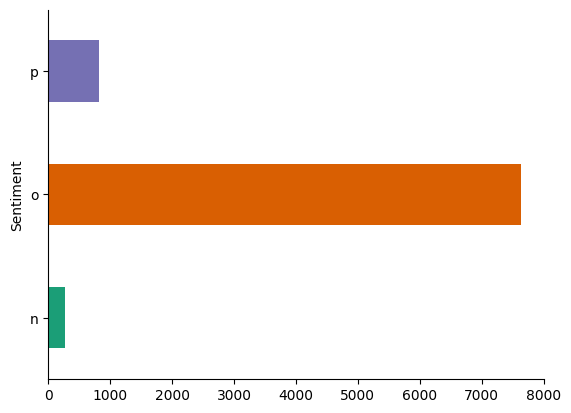

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#data preprocessing
import re
def striphtml(data):
 p=re.compile(r'<.*?>')
 return p.sub('',data)
 df['Citation_Text'] = df['Citation_Text'].apply(striphtml)


In [ ]:
#tokenizer+stop words removal+Lemmatizer
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data (only run once)
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#  Lowercase, remove digits and non-letters
def clean_text(text):
    text = text.lower()                          # Lowercase
    text = re.sub(r'\d+', '', text)              # Remove digits
    text = re.sub(r'[^a-z\s]', '', text)         # Remove punctuation/special chars
    return text

In [ ]:
#  Tokenize, remove stopwords, and lemmatize
def tokenize_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    filtered = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered)


In [ ]:
# Combine all preprocessing steps
def full_preprocess(text):

    text = clean_text(text)
    text = tokenize_lemmatize(text)
    return text

# Apply on DataFrame
df['Citation_Text'] = df['Citation_Text'].astype(str).apply(full_preprocess)

In [ ]:
df.head()

,Source_Paper_ID,Target_Paper_ID,Sentiment,Citation_Text
0,A00-1043,A00-2024,o,analyzed set article identified six major oper...
1,H05-1033,A00-2024,o,table example compression compression avglen r...
2,I05-2009,A00-2024,o,related work discussion twostep model essentia...
3,I05-2009,A00-2024,o,proposed summarization system based draft revi...
4,I05-2009,A00-2024,o,found deletion lead part occur often summary u...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Source_Paper_ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Citation_Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Citation_Text'].value_counts()
    for x_label, grp in _df_2.groupby('Source_Paper_ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Source_Paper_ID')
_ = plt.ylabel('Citation_Text')

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec on your tokenized Citation_Text column
sentences = df['Citation_Text'].tolist()

# Train the model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors
word_vectors = model.wv

# Get document vectors (average of word vectors)
doc_vectors = []
for sentence in sentences:
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if vectors:
        doc_vectors.append(np.mean(vectors, axis=0))
    else:
        doc_vectors.append(np.zeros(100))

doc_vectors = np.array(doc_vectors)

print(f"Model trained with vocabulary size: {len(model.wv.key_to_index)}")
print(f"Document vectors shape: {doc_vectors.shape}")


Model trained with vocabulary size: 27
Document vectors shape: (8736, 100)


In [ ]:
# Get all words in the vocabulary
all_words = list(model.wv.key_to_index.keys())
print(f"Total words in vocabulary: {len(all_words)}")

# Get embeddings for all words
all_embeddings = {}
for word in all_words:
    all_embeddings[word] = model.wv[word]

# Or as a matrix
embeddings_matrix = model.wv[all_words]
print(f"Embeddings matrix shape: {embeddings_matrix.shape}")

# Display first few words and their embeddings
for i, word in enumerate(all_words[:10]):
    print(f"{word}: {model.wv[word]}")

Total words in vocabulary: 27
Embeddings matrix shape: (27, 100)
 : [-0.05378415  0.05905203  0.16869159  0.15045068 -0.26901785 -0.18349738
  0.18488386  0.30994672 -0.41393015 -0.05820789  0.00124253 -0.0402542
 -0.13283533  0.10942818 -0.15869242 -0.04684874  0.16152075  0.09588752
 -0.02101426 -0.19426209 -0.09095254 -0.071833    0.2774662  -0.36897525
 -0.05534721  0.01037463 -0.32599658  0.400603   -0.00496989  0.0856965
  0.08570518 -0.01940853  0.14247476 -0.16911782 -0.0890409  -0.04430833
  0.27178442 -0.2090557  -0.02770721 -0.02907     0.08570042 -0.03710357
 -0.18865667 -0.05150043  0.01149181  0.03125905 -0.02482877  0.07642045
  0.06684693 -0.10523305 -0.22435416 -0.05741996  0.07476072  0.05830393
  0.01452441 -0.06343437 -0.04133377 -0.04926565  0.26548517  0.18657073
 -0.03291633 -0.29731122  0.07867166  0.05648135 -0.04995512  0.1597493
  0.17998005  0.16293359 -0.40663064  0.28542885 -0.22619452  0.18601783
  0.24400651 -0.05689902  0.06212332 -0.0416465  -0.0765002